# Testando a classe do Perceptron multiclasse implementada

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split as tts
from sklearn.datasets import load_wine

sys.path.append("/home/dimi/Programming/MachineLearningUFABC/Projeto_Perceptron_Adaline_MLP/python/")
from PerceptronClass import Perceptron

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
params = {'figure.figsize': [7, 4], 
          'axes.labelsize': 12,
          'axes.titlesize':16, 
          'font.size': 12,
          'legend.fontsize': 12, 
          'xtick.labelsize': 10, 
          'ytick.labelsize': 10
         }
plt.rcParams.update(params)

## Importando um dataset

In [3]:
data   = load_wine().data
target = load_wine().target

## Testando

In [ ]:
# INSTANCIANDO
objPerceptron = Perceptron(taxaAprendizagem=1e-4, qtdMaxEpocas=5000)

# BOOTSTRAP
acuracias = []
for i in range(1,6):
    
    # SEPARANDO ENTRE TREINAMENTO E TESTE
    xTrain, xTest, yTrain, yTest = tts(data, target, test_size=0.25, shuffle=True)
    
    # TREINANDO
    objPerceptron.treinar(xTrain, yTrain)
    
    # PREDIZENDO
    yPred = objPerceptron.predizer(xTest)
    
    # CALCULANDO ACURACIA
    acuraciaAtual = accuracy_score(yTest, yPred)
    acuracias.append(acuraciaAtual)
    print("Acurácia na iteração " + str(i) + ": " + str(acuraciaAtual))
    
print("\n\n\nAcurácia Média:", np.mean(acuracias), "+-", np.std(acuracias))

Acurácia na iteração 1: 0.9777777777777777
Acurácia na iteração 2: 1.0
Acurácia na iteração 3: 0.9777777777777777


## Obtendo innformações sobre cada neurônio

Text(0, 0.5, 'Acurácia')

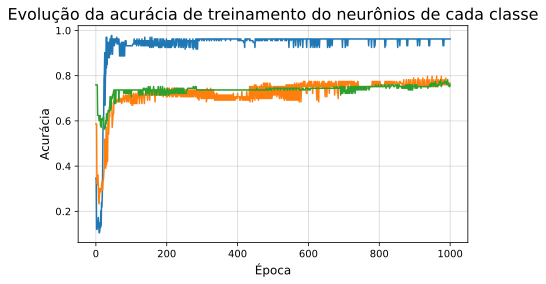

In [8]:
plt.plot(objPerceptron.arrayNeuronios[0].evolucaoAcuracias)
plt.plot(objPerceptron.arrayNeuronios[1].evolucaoAcuracias)
plt.plot(objPerceptron.arrayNeuronios[2].evolucaoAcuracias)
plt.grid(alpha=0.5)
plt.title("Evolução da acurácia de treinamento do neurônios de cada classe")
plt.xlabel("Época")
plt.ylabel("Acurácia")

Text(0, 0.5, 'Peso')

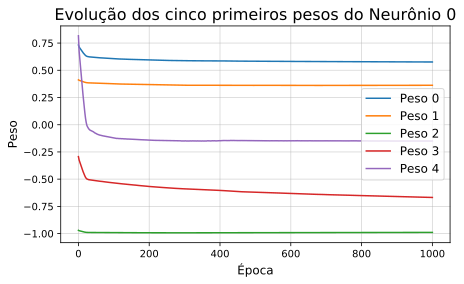

In [9]:
plt.plot(objPerceptron.arrayNeuronios[0].evolucaoPesos[0], label="Peso 0")
plt.plot(objPerceptron.arrayNeuronios[0].evolucaoPesos[1], label="Peso 1")
plt.plot(objPerceptron.arrayNeuronios[0].evolucaoPesos[2], label="Peso 2")
plt.plot(objPerceptron.arrayNeuronios[0].evolucaoPesos[3], label="Peso 3")
plt.plot(objPerceptron.arrayNeuronios[0].evolucaoPesos[4], label="Peso 4")
plt.grid(alpha=0.5)
plt.legend()
plt.title("Evolução dos cinco primeiros pesos do Neurônio 0")
plt.xlabel("Época")
plt.ylabel("Peso")